<h1><center> Math761 - HW 5 <br>
MC Integration and Importance Sampling </center> </h1>


## General Instructions

_This homework requires you two submit two things now and one thing later:_

1) A jupyter notebook (.ipynb file) which will include your code, the results from when you ran the code, and textual interpetations as asked in the questions.

2) A video (10 minute max).  Each question specifies the part you need to explain by video. For example, if part a of question 1 says "**Explain in Video**", then after you have finished writing up your work **(which may include math calculations as well as code)** to your satisfaction (or to the point where you have to submit before the deadline!), please record a video where you go over your work (math and code) and explain what each part of it does and the role each part plays in helping you to achieve the statistical goal of the question. Note that the whole video you submit for your whole assignment should be 10 minutes or less. If your video goes over the max limit, I will only grade or give feedback up to the max limit. This is so that I can give everyone feedback in a timely manner. It may be helpful if you rehearse your video before you record it or use a video editor (Da Vinci is free) to help you keep your video under the time limit while letting you cover all the important information you want to explain.

3) After I give you feedback on the homework, you'll submit your own scoring of your corrected work, where you should also explain why you gave yourself each rubric score. Please submit your corrected work with this.

_This homework also has a metacognitive component that asks you to reflect on your own learning_:
To give you the opportunity and encourage you to reflect on your own work, learn from mistakes, and reward you for improving, for the last two questions of each homework, I will provide you feedback but no grade. Instead, you will be able to take the feedback to improve your work. Then you will self-assess using the rubric provided. This you will simply need to submit before the midterm. There will be a submission link on MyOpenMath for you before then.

<br>

_Grading_:
The two grading rubrics (how I will grade and the rubric you will use to self-assess your improvements) are here https://docs.google.com/document/d/15uZqvLzWMcp1pvTfCKdq7qcCEpSDBtSQxYeEVn3XUYw/edit?usp=sharing. The grade you will see for this homework will be the grade that I provide on my two questions. However, they are only worth 50% of your HW grade. You will submit your self-assessment (before the midterm), which you should also save for your "portfolio". At the end of the term, we will meet for 5-10 minutes to go over your portfolio so that you can tell me how you evaluate your own improvements and how you graded yourself. Based on this we will come up with the other 50% of your overall HW grade.




<br>

### Exercise 1: Compare MC Integrals 

**Explain in Video** Compute two MC estimates of

$$
\theta = \int_{0}^{0.5} e^{-x}dx.
$$

a) First, generate $\hat{\theta}$ by sampling from Uniform(0, 0.5) 10000 times, and also estimate the variance of $\hat{\theta}$.  Show any math needed to create your estimator.

**Hint** set.seed(1) should give you a mean of `0.393501417048076`.

b) Second, find another MC estimator $\tilde{\theta}$ by sampling from the exponential distribution 10,000 times, and also estimate the variance of $\tilde{\theta}$. Show any math needed to create your estimator.

**Hint** set.seed(1) should give you a mean of `3.949000e-01`

c) Create a side-by-side boxplot of the 10,000 runs of these two estimators.

d) Compute the theoretical value of $\theta$.

e) Which of the variances of  $\hat{\theta}$ and $\tilde{\theta}$ is smaller. Explain using the idea of efficiency.

#### (a) Generating theta_hat by sampling from U(0,0.5), n = 10000

In [41]:
#Set seed to 1
set.seed(1)

#Define the parameters a,b, and n
a = 0
b = 0.5
n = 10000

#Generate 10000 uniform random variables between 0 and 0.5 and store them in u
u = runif(n,a,b)

#Define the h(x)
h1 <- function(x){
    return(exp(-x)/2)
} 

#Find Mean of the estimator
estimator1_mean = mean(h1(u))

#Find Variance of the estimator
#Changes made:
#Previously, I tried to calculate variance by custom implementing the variance formula
#But, now I used the built-in variance function var().
#We already know that, Variance of estimator = Variance(h(X))/n
estimator1_variance = var(h1(u))/n

#Display the output 
print(paste("Mean of estimator:", estimator1_mean))
print(paste("Variance of estimator:", estimator1_variance))

[1] "Mean of estimator: 0.393501417048076"
[1] "Variance of estimator: 3.26095509078327e-07"


#### (b) Generating theta_hat by sampling from exponential distribution, n = 10000

In [39]:
#Set seed to 1
set.seed(1)

#Define the parameters lambda and n
lambda = 2
n = 10000

#Generate 10000 exponential random variables with rate 2 and store them in e
e = rexp(n, lambda)

#Define the h(x)
#Changes made:
#Indicator function 1(x<=0.5) is added to h(x). 
h2 <- function(x){
    return((exp(x)/2) * (x<=0.5))
}

#Find Mean of the estimator
estimator2_mean = mean(h2(e))
#Find Variance of the estimator
estimator2_variance = var(h2(e))/n

#Display the output 
print(paste("Mean of estimator:", estimator2_mean))
print(paste("Variance of estimator:", estimator2_variance))

[1] "Mean of estimator: 0.394874828127106"
[1] "Variance of estimator: 9.46155642679788e-06"


#### (c) Boxplot of the two estimators 

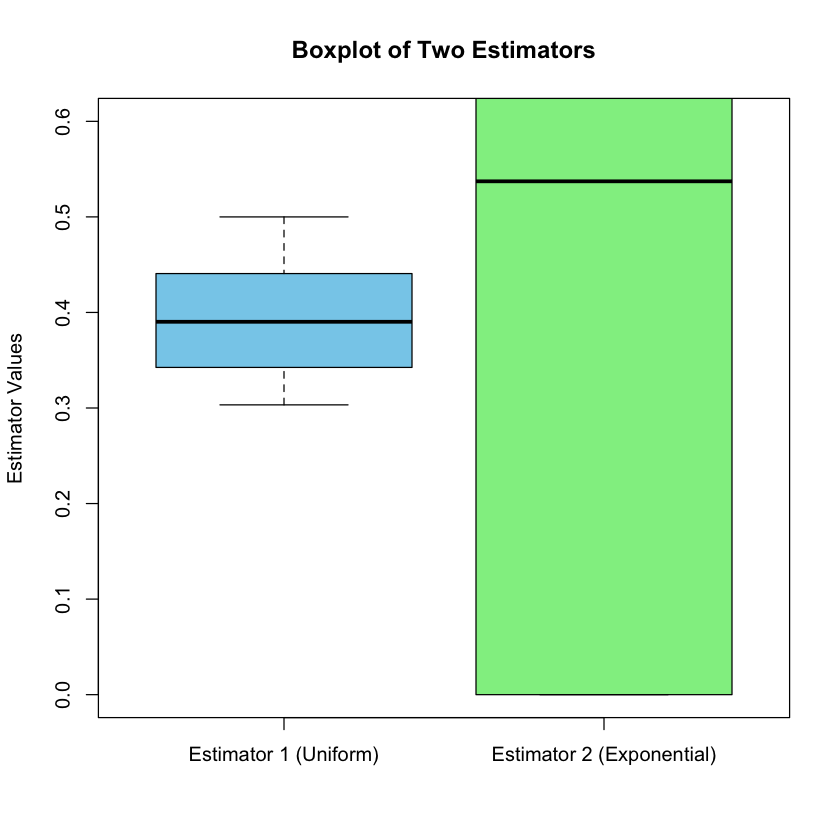

In [40]:
estimator1 = h1(u)
estimator2 = h2(e)

estimators_list <- list(Estimator1 = estimator1, Estimator2 = estimator2)
# Create a side-by-side boxplot
boxplot(estimators_list, main="Boxplot of Two Estimators",
        names=c("Estimator 1 (Uniform)", "Estimator 2 (Exponential)"),
        ylab="Estimator Values", col=c("skyblue", "lightgreen"), ylim=c(0,0.6))

#### (d) 

#### Written work is in pdf file

#### (e) Efficiency of the estimators 

##### First estimator - X sampled from U(0,0.5)
##### Second estimator - X sampled from Exp(2)

##### The variance of the first estimator(3.26062899527419e-07) is smaller than the second estimator(9.46155642679788e-06). We know that the efficiency of an estimator is explained by it's variance, since the variance of the first estimator is low we can say that, first estimator is more efficient than the second estimator. 

### Exercise 2: Math Manipulation

Recall from class that it is possible to create estimates of $\Phi(x)= \int_{-\infty}^x \frac{1}{\sqrt{2\pi}} e^{-s^2/2} ds$ by generating random variables from $U(0,x)$.

a) **Write-up only** Show the math that justifies how you can form an estimate of $\Phi(x)$ by using $U(0, x)$ random variables. Hint: this should look similar to the reasoning for the $U(a, b)$ example from class.

b) **Explain in Video** Estimate $\Phi(x)$ for a sequence of 10 equally spaced $x$ values from $-2.5$ to $-.1$ and 10 equally spaced $x$ values from from $.1$ to $2.5.$ Then plot these values as a line plot. Use a sample of 10,000 to estimate each integral.

**Hint** The integral for $x = -2.5$ should be `0.005611057` with SE of ` 0.006209665`.

#### (a)

#### Written work is in pdf file

#### (b) Estimating phi(x) for x values from -2.5 to -.1 and x values from .1 to 2.5

X1,Phi_of_X1,SE_of_X1,X2,Phi_of_X2,SE_of_X2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-2.50,0.005611057,0.0059315885,2.50,0.9836952,0.0033916864
-2.26,0.012135737,0.0055984711,2.26,0.9915470,0.0029839155
-2.02,0.017949065,0.0052931291,2.02,0.9767335,0.0024950779
-1.78,0.038141717,0.0048316371,1.78,0.9574272,0.0020039789
-1.54,0.064003101,0.0043273523,1.54,0.9377990,0.0015065266
-1.30,0.097305225,0.0037591083,1.30,0.9048541,0.0010279157
-1.06,0.144716213,0.0030281935,1.06,0.8553213,0.0005847755
-0.82,0.206094202,0.0021360238,0.82,0.7935541,0.0003681640
-0.58,0.280907560,0.0010757763,0.58,0.7191691,0.0006857844


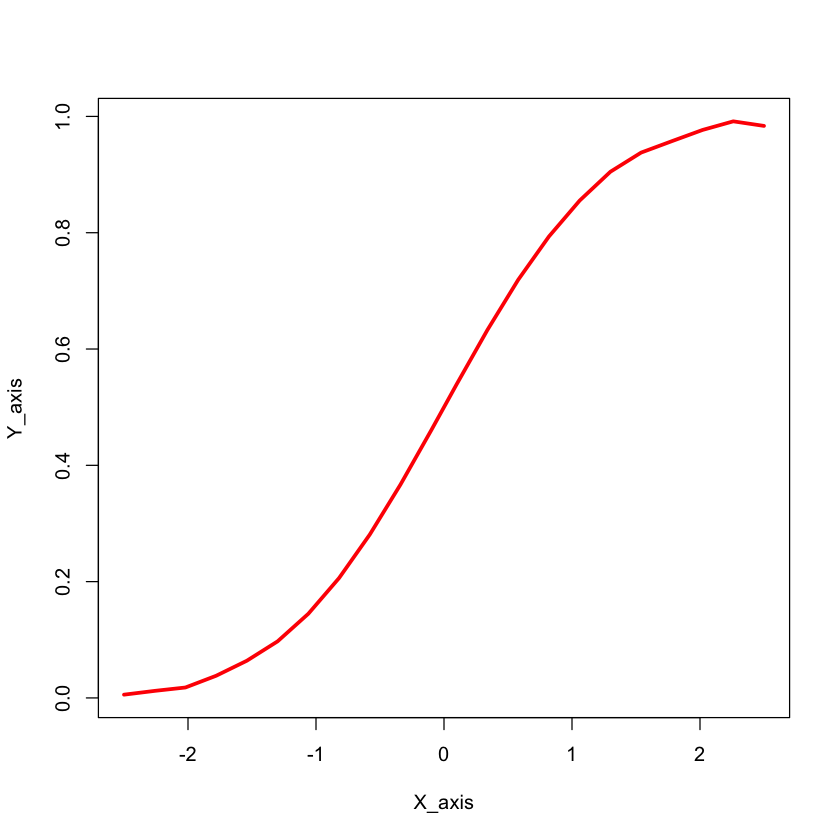

In [42]:
#Set seed
set.seed(1)

#Define x1, x2 and n
x1 = seq(-2.5, -0.1, (-0.1+2.5)/10)
x2 = seq(0.1, 2.5, (2.5-0.1)/10)
n  = 10000

#Define part of h(x)
h <- function(x){
    return(exp(-x^2/2))
}

#Define null vectors to store resultant estimations for each sequence of values 
estimates_for_x1 = c()
estimates_for_x2 = c()

#Define null vectors to store resultant standard errors for each sequence of values
SE_for_x1 = c()
SE_for_x2 = c()

#Loop through the x1 vector and store the estimations for each x1
for(idx in seq(1,length(x1))){
    u = runif(n,min=0,max=abs(x1[idx]))
    hx = abs(x1[idx])*mean(h(u))
    #Since given distribution is standard normal distribution which is symmetric about the mean and area under the curve is 1, 
    #Following CDF property holds true,
    # P(X=2) + P(X=-2) = 1
    estimates_for_x1[idx] = 0.5 - (hx*(1/sqrt(2*pi)))
    SE_for_x1[idx] = (1/sqrt(2*pi))*(1/n)*(sqrt(sum((abs(x1[idx])*h(u) - estimates_for_x1[idx])^2)))
}

#Loop through the x2 vector and store the estimations for each x2
for(idx in seq(1,length(x2))){
    u = runif(n,min=0,max=x2[idx])
    hx = (1/sqrt(2*pi))*mean(h(u))
    estimates_for_x2[idx] = 0.5 + (hx*x2[idx])
    SE_for_x2[idx] = (1/sqrt(2*pi))*(1/n)*(sqrt(sum((x2[idx]*h(u) - estimates_for_x2[idx])^2)))
}

#Create a data frame to store the Phi values 
estimates_df = data.frame(X1=x1, Phi_of_X1=estimates_for_x1, SE_of_X1=SE_for_x1,
                          X2=rev(x2), Phi_of_X2 = rev(estimates_for_x2), SE_of_X2=rev(SE_for_x2))

#Display the resultant dataframe
estimates_df

#Plot the graph
X_axis = cbind(estimates_df$X1, rev(estimates_df$X2))
Y_axis = cbind(estimates_df$Phi_of_X1, rev(estimates_df$Phi_of_X2))

plot(X_axis, Y_axis, type='l', lwd=3, col='red')


### Exercise 3: Importance Sampling


**Explain in Video** Obtain Monte Carlo estimates of 
$$
\int_{1}^{\infty} \frac{x^2}{\sqrt{2\pi}}e^{-x^2/2}dx
$$
by importance sampling.

a) For this, you must try out four different importance samplers. Use these two
   - $$
   g_1(x) = \frac{\sqrt{e}}{2}e^{-x/2} \text{ for x > 1 }
   $$
   
   - $$ 
   g_2(x) = \frac{e^{1/2.88}}{1.44}xe^{-x^2/2.88} \text{ for x > 1}
   $$
   
   and also create two of your own. Please give the equations of your two functions. Also plot all four importance functions along with h(x)f(x) on a single plot.
   
b) Use all four $g_{i}(x)$ to obtain MC estimates of the integral, using a sample of 10000 for each importance function, and also report the estimated variance. Put both estimates and variances in a table. Which of your functions is best and why? Please show any math needed.

**hint:** My two functions and the integrand should look like this:
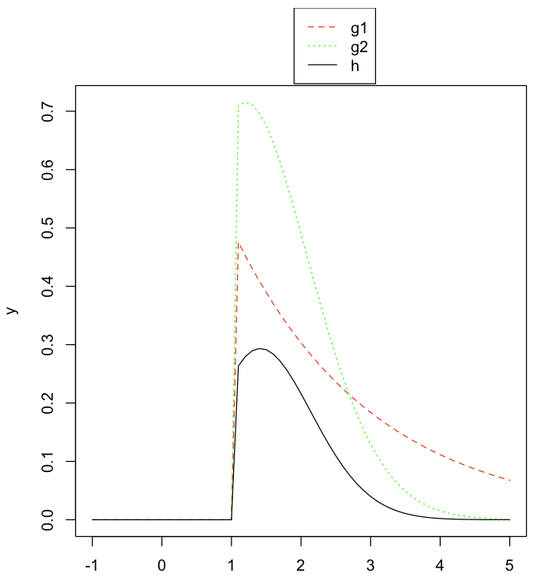

#### (a) Plots of h(x)f(x) and the 4 proposal distributions

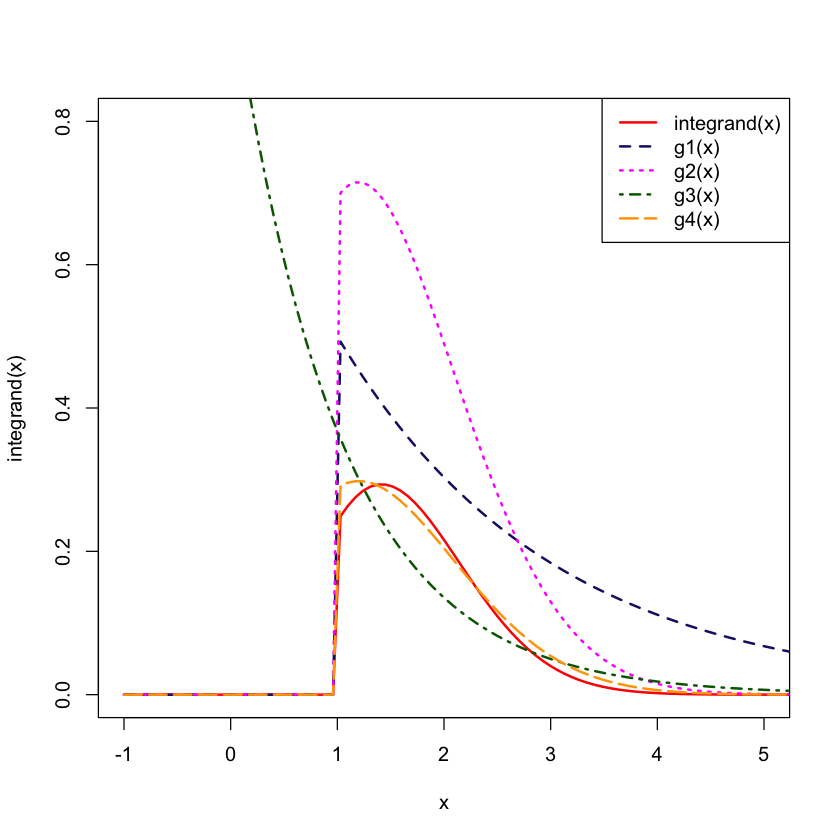

In [69]:
#Define the integrand - h(x)*f(x)
integrand <- function(x){
    (x^2 / sqrt(2*pi)) * exp(-x^2 /2) * (x>1)
    }

#Define g1(x) - proposal distribution 1
g1 <- function(x){
    (sqrt(exp(1)) / 2) * exp(-x /2) * (x>1)
}

#Define g2(x) - proposal distribution 2
g2 <- function(x){
    (exp(1/2.88)/1.44) * x * exp(-x^2 /2.88) * (x>1)
}

#Define g3(x) - proposal distribution 3
g3 <- function(x){
    exp(-x)
}

#Define g4(x) - proposal distribution 4
g4 <- function(x){
    (1/2.4)*(exp(1/2.88)/1.44) * x * exp(-x^2 /2.88) * (x>1)
}

#Plot the integrand along with the 4 proposal distributions
curve(integrand(x), from=-1, to=6, ylim=c(0,0.8), xlim=c(-1,5), lwd=2, col="red")
curve(g1(x), from=-1, to=6, add=TRUE, lwd=2, col="midnightblue", lty=2)
curve(g2(x), from=-1, to=6, add=TRUE, lwd=2, col="magenta",lty=3)
curve(g3(x), from=-1, to=6, add=TRUE, lwd=2, col="darkgreen",lty=4)
curve(g4(x), from=-1, to=6, add=TRUE, lwd=2, col="orange",lty=5)
legend("topright", legend = c("integrand(x)", "g1(x)", "g2(x)", "g3(x)", "g4(x)"), col=c("red", "midnightblue", "magenta", "darkgreen", "orange"), 
      lty=c(1:5), lwd=rep(2,5))


#### (b) Estimating the integrand using the 4 proposal distributions

In [70]:
#Set seed to 1
set.seed(1)

#Define n and u - uniform random variable U(0,1)
n = 10000
u = runif(n,0,1)

#It is difficult to sample from the given proposal distributions, so I made use of uniform distribution
# I performed inverse transformation method on the proposal distributions and obtained new sampling equations

#Define sampling equation for g1(x)
s1 <- 1 - 2*log(1-u)

#Define sampling equation for g2(x)
s2 <- sqrt(1 - 2.88*log(1-u))

#Define sampling function for g3(x)
s3 <- -log(1-u)

#Define sampling function for g4(x)
#To keep the samples within the valid range of the logarithm function. I sampled u from 0 to 1/2.4, instead of 0 to 1.
g4u <- runif(n, 0, 1/2.4) 
s4 <- sqrt(1 - (2.88)*log(1- g4u))

#Find the estimators for the proposal distributions
estimator_1 <- mean(integrand(s1)/ g1(s1))
estimator_2 <- mean(integrand(s2)/ g2(s2))
estimator_3 <- mean(integrand(s3)/ g3(s3))
estimator_4 <- mean(integrand(s4)/ g4(s4))

#Find the variances for all the proposal distributions
var_1 <- var(integrand(s1)/ g1(s1)) /n
var_2 <- var(integrand(s2)/ g2(s2)) /n
var_3 <- var(integrand(s3)/ g3(s3)) /n
var_4 <- var(integrand(s4)/ g4(s4)) /n

result_df = data.frame(Proposal_Distribution=c("g1(x)", "g2(x)", "g3(x)", "g4(x)"), 
                       Mean = c(estimator_1, estimator_2, estimator_3, estimator_4),
                      Variance = c(var_1, var_2, var_3, var_4))

result_df

Proposal_Distribution,Mean,Variance
<chr>,<dbl>,<dbl>
g1(x),0.4011382,9.196335e-06
g2(x),0.3997170,3.021105e-07
g3(x),0.4020442,3.464360e-05
g4(x),0.9658208,4.010330e-07


##### Proposal function g2(x) seems to be best, as it's variance is very much lower compared to other proposal distributions